# Lesson 3 Assignment - Monty Hall Simulation
## Author - Ana Javed

### Instructions
Simulate the conditional probabilities of the distributions for winning a car vs. a goat for the Monty Hall Problem that includes the following:
1. the cases for switching or not switching
2. histograms and summary statistics (at least mean and variance) of the results for winning the car or a goat for both strategies: switching or not switching
3. comparison of the cases to determine the best strategy
4. recommended strategy



#### Note: 
Please clearly outline the results and your recommendation with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [14]:
# Import libraries that may be used for this assignment: 
from __future__ import division 

import numpy
import pandas
import scipy
import scipy.stats
from matplotlib import pyplot
import seaborn
import random

# Configuring plot visualization
seaborn.set_palette('muted')
seaborn.set_style('ticks')
%matplotlib inline

# Creating a Dataframe where simulation samples will be appended to! 
combined_results_df = pandas.DataFrame(
    columns = ['Door', 'Starting_Probability', 'Contains', 
               'Door_desc', 'Win_Car','Total_Probability', 'Players_Choice'])


In [11]:
# Simulating 2000 samples of the Monty Hall Game 
for i in range (0, 2000, 1):
    
    # Setting seed for reproducibility
    random.seed(i)
    
    # Establishing options for doors & switching 
    first_door_options = ['door1', 'door2', 'door3']
    first_remaining_options = ['door1', 'door2', 'door3']
    second_choice = ['stay', 'change']

    ## Setting Up Dataframe, placing standard values in for each door as a placeholder. 
    # Most of these columns will be updated below: 
    door_probabilities = {}
    door_probabilities["Door"] = first_door_options
    door_probabilities["Starting_Probability"] = [(1/3), (1/3), (1/3)]
    door_probabilities["Contains"] = ['goat', 'goat','goat']
    door_probabilities["Door_desc"] = ['choice', 'choice','choice']
    door_probabilities["Win_Car"] = ['no', 'no', 'no']
    door_probabilities["Total_Probability"] = [(1/3), (1/3), (1/3)]
    door_probabilities["Players_Choice"] = ['change', 'change', 'change']
        
    door_probabilities = pandas.DataFrame(door_probabilities)
    
    ## Randomizing which door the Contestant Chooses, and which one has the car
    first_door_choice = random.choice(first_door_options)  
    car_behind_door = random.choice(first_door_options)   
    first_remaining_options.remove(first_door_choice) # Removing the Player's first Door Choice

    # Randomizing Which Door Monte Chooses, adjusting/switching if the door chosen is a car! 
    Monte_reveal = random.choice(first_remaining_options) 

    if Monte_reveal == car_behind_door:
        choice_change = first_remaining_options
        choice_change.remove(car_behind_door)
        Monte_reveal = random.choice(choice_change)

    # Assigning to a variable Which Door has the Car 
    Is_car = door_probabilities.loc[:, 'Door' ] == car_behind_door
    door_probabilities.loc[Is_car,'Contains'] = 'car'

    #  Assigning to a variable Which Door Monte Reveals 
    Is_monte_reveal = door_probabilities.loc[:, 'Door' ] == Monte_reveal
    door_probabilities.loc[Is_monte_reveal,'Door_desc'] = 'Monte_Reveals'

    # Assigning to a variable Door Player Chooses first 
    Is_players_first_choice = door_probabilities.loc[:, 'Door' ] == first_door_choice
    door_probabilities.loc[Is_players_first_choice,'Door_desc'] = 'Player_First_Choice'

    # Randomizing the Contestants Choice of Staying/Changing
    players_choice_after_reveal = random.choice(second_choice)  
    
    # Defaulting this variable to no. Will reassign it if Player stays/change their door: 
    win = 'no'

    # Updating Total Probabilities 

    if (first_door_choice == car_behind_door):
        first_choice_array = door_probabilities.loc[:, 'Door'] == first_door_choice
        door_probabilities.loc[first_choice_array,'Total_Probability'] = (1/3) * (1/2)  # Door Probability

        if players_choice_after_reveal == 'stay': # Updating win to "Yes" if player stays on their door 
            win = 'yes'

    if (first_door_choice != car_behind_door):
        first_choice_array = door_probabilities.loc[:, 'Door'] == first_door_choice
        door_probabilities.loc[first_choice_array,'Total_Probability'] = (1/3) * (1)    # Door Probability

        if players_choice_after_reveal == 'change': # Updating win to "Yes" if player stays on their door 
            win = 'yes'
            
    # Updating Dataframe to capture Whether A Contestant Won after 2nd Decision 
    Is_players_first_choice = door_probabilities.loc[:, 'Door' ] == first_door_choice # Boolean array 
    door_probabilities.loc[Is_players_first_choice,'Win_Car'] = win

    
    # Updating Dataframe to capture Player's Choice to Stay or Change 
    door_probabilities.loc[first_choice_array,"Players_Choice"]  = players_choice_after_reveal # Did Player change or stay? 
    

    ## Adding contestants result back to the main DF 
    combined_results_df = combined_results_df.append(door_probabilities.loc[first_choice_array,:] , ignore_index = True) 



In [15]:
######### Conducting some additional validation on result counts and data output: 

# print(combined_results_df.head(100))  # Top 100 rows 

# print(combined_results_df.loc[:, 'Win_Car'].value_counts())  # Distinct Value Counts of Win/Losses 
# print(combined_results_df.loc[:, 'Players_Choice'].value_counts()) # Distinct Value Counts of Staying/Changing Choices
# print(combined_results_df.loc[:, 'Total_Probability'].value_counts()) # Distinct Value Counts of Total Probability 


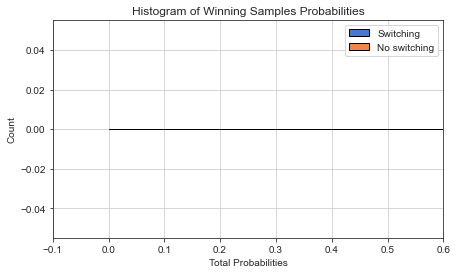

In [16]:
# Separating Datasets between Contestant Switching and Not Switching: For Histogram Below
Switching = (combined_results_df.loc[(combined_results_df.loc[:, 'Players_Choice'] == 'change'),:]) # All rows where player changed
No_switching = (combined_results_df.loc[(combined_results_df.loc[:, 'Players_Choice'] == 'stay'),:]) # All rows where player didn't change
                                          
                                     
## Only wanting instances where Contestant Did win                                     
Switching_win = (Switching.loc[(Switching.loc[:, 'Win_Car'] == 'yes'),:]) # All wins from Switchings
No_switching_win = (No_switching.loc[(No_switching.loc[:, 'Win_Car'] == 'yes'),:]) # All wins from not switching


## Winning the Car Probabilities based on Action: 

pyplot.figure(figsize=(7, 4))
pyplot.hist(data=Switching_win, x='Total_Probability', label = 'Switching', edgecolor='black')
pyplot.hist(data=No_switching_win, x='Total_Probability', label = 'No switching', edgecolor='black')
pyplot.legend()
pyplot.xlabel('Total Probabilities')
pyplot.ylabel('Count')
pyplot.title('Histogram of Winning Samples Probabilities')
pyplot.xlim(-0.1, 0.6)
pyplot.grid(True)
pyplot.show()

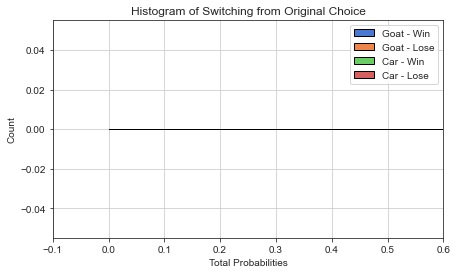

In [17]:
## Car/Goat Probabilities for Switching 

                                     
## Only wanting instances of car vs goat                                   
# Switching_win = (Switching.loc[(Switching.loc[:, 'Win_Car'] == 'yes'),:])

Switching_goat = (Switching.loc[(Switching.loc[:, 'Contains'] == 'goat'),:])
Switching_car = (Switching.loc[(Switching.loc[:, 'Contains'] == 'car'),:])


Switching_goat_win = Switching_goat.loc[Switching_goat.loc[:, "Win_Car"] == 'yes', :]
Switching_goat_lose = Switching_goat.loc[Switching_goat.loc[:, "Win_Car"] == 'no', :]

Switching_car_win = Switching_car.loc[Switching_car.loc[:, "Win_Car"] == 'yes', :]
Switching_car_lose =  Switching_car.loc[Switching_car.loc[:, "Win_Car"] == 'no', :]
    

# print(Switching_goat.head())

pyplot.figure(figsize=(7, 4))
pyplot.hist(data=Switching_goat_win, x='Total_Probability', label = 'Goat - Win', edgecolor='black')
pyplot.hist(data=Switching_goat_lose, x='Total_Probability', label = 'Goat - Lose', edgecolor='black')

pyplot.hist(data=Switching_car_win, x='Total_Probability', label = 'Car - Win', edgecolor='black')
pyplot.hist(data=Switching_car_lose, x='Total_Probability', label = 'Car - Lose', edgecolor='black')
pyplot.legend()
pyplot.xlabel('Total Probabilities')
pyplot.ylabel('Count')
pyplot.title('Histogram of Switching from Original Choice')
pyplot.xlim(-0.1, 0.6)
pyplot.grid(True)
pyplot.show()

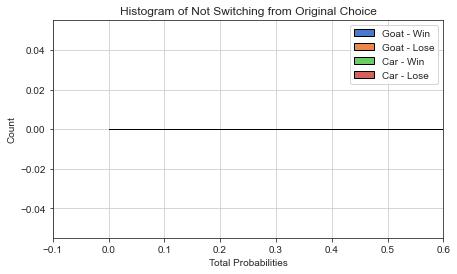

In [18]:
## Car/Goat Probabilities for Not Switching 

No_switching_goat = (No_switching.loc[(No_switching.loc[:, 'Contains'] == 'goat'),:])
No_switching_car = (No_switching.loc[(No_switching.loc[:, 'Contains'] == 'car'),:])

No_switching_goat_win = No_switching_goat.loc[No_switching_goat.loc[:, "Win_Car"] == 'yes', :]
No_switching_goat_lose = No_switching_goat.loc[No_switching_goat.loc[:, "Win_Car"] == 'no', :]

No_switching_car_win = No_switching_car.loc[No_switching_car.loc[:, "Win_Car"] == 'yes', :]
No_switching_car_lose =  No_switching_car.loc[No_switching_car.loc[:, "Win_Car"] == 'no', :]
    
    
pyplot.figure(figsize=(7, 4))

pyplot.hist(data=No_switching_goat_win, x='Total_Probability', label = 'Goat - Win', edgecolor='black')
pyplot.hist(data=No_switching_goat_lose, x='Total_Probability', label = 'Goat - Lose', edgecolor='black')

pyplot.hist(data=No_switching_car_win, x='Total_Probability', label = 'Car - Win', edgecolor='black')
pyplot.hist(data=No_switching_car_lose, x='Total_Probability', label = 'Car - Lose', edgecolor='black')

pyplot.legend()
pyplot.xlabel('Total Probabilities')
pyplot.ylabel('Count')
pyplot.title('Histogram of Not Switching from Original Choice')
pyplot.xlim(-0.1, 0.6)
pyplot.grid(True)
pyplot.show()

In [80]:
## Summary Statistics 

print("----------Mean of All the Samples----------")
print(combined_results_df.loc[:,["Total_Probability", "Win_Car"]].groupby("Win_Car").mean())
print('\n')

print("----------Variance of All the Samples----------")
print(combined_results_df.loc[:,["Total_Probability", "Win_Car"]].groupby("Win_Car").var())
print('\n')

print("Dataframe Dimensions: ")
print(combined_results_df.shape)
print('\n')

print("Summary Statistics: ")
combined_results_df.loc[:,["Total_Probability", "Win_Car"]].describe()

----------Mean of All the Samples----------
         Total_Probability
Win_Car                   
no                0.279960
yes               0.277888


----------Variance of All the Samples----------
         Total_Probability
Win_Car                   
no                0.006049
yes               0.006169


Dataframe Dimensions: 
(6000, 7)


Summary Statistics: 


,Total_Probability
count,6000.000000
mean,0.278917
std,0.078162
min,0.166667
25%,0.166667
50%,0.333333
75%,0.333333
max,0.333333


In [81]:
## Additional Summary Statistics, break down by Switching/Not Switching

print("----------Mean & Summary Statistics of Switching Your Door----------")
print(Switching.loc[:,["Total_Probability", "Win_Car"]].groupby("Win_Car").mean())
print('\n')

print(Switching.loc[:,["Total_Probability", "Win_Car"]].describe())
print('\n')


print("----------Mean & Summary Statistics of Not Switching Your Door----------")
print(No_switching.loc[:,["Total_Probability", "Win_Car"]].groupby("Win_Car").mean())
print('\n')


print(No_switching.loc[:,["Total_Probability", "Win_Car"]].describe())
print('\n')




----------Mean & Summary Statistics of Switching Your Door----------
         Total_Probability
Win_Car                   
no                0.166667
yes               0.333333


       Total_Probability
count        2970.000000
mean            0.279798
std             0.077837
min             0.166667
25%             0.166667
50%             0.333333
75%             0.333333
max             0.333333


----------Mean & Summary Statistics of Not Switching Your Door----------
         Total_Probability
Win_Car                   
no                0.333333
yes               0.166667


       Total_Probability
count        3030.000000
mean            0.278053
std             0.078483
min             0.166667
25%             0.166667
50%             0.333333
75%             0.333333
max             0.333333


